In [6]:
# pandas kütüpanesi yardımı ile kendi veri kümenizi DataFrame formatında
# oluşturabilirsiniz.
import pandas as pd
# Kendi veri kümenizi aşağıdaki şekilde json formatında tanımlanabilirsiniz.
# Burada verilerin başlıkları ve veri dizisi arasında : kullanılır.
# Formatı {'VeriBaşlığı': [Virgülle ayrılan veri dizisi]}
mydataset = {
  'Sicaklik': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5],
  'Nem': [5.1, 4.7, 4.3, 3.9, 3.7, 3.4, 3.1, 2.8, 2.5, 2.2, 2.4, 2.7, 2.8, 3.2, 3.5 ],
  'KayisiUretim': [2.5, 2.8, 3.1, 3.4, 3.7, 3.9, 4.3, 4.6, 4.9, 5.3, 5.1, 4.8, 4.5, 4.3, 3.9]
}
# json formatında verinin DataFrame dönüşümü
# DataFrame'i bir tablo gibi düşünebilirsiniz.
data = pd.DataFrame(mydataset)

# DataFrame formatında veri kümesini inceleyelim.
# Verinin tamamı
print('Bütün veriler \n',data)
# Dataframe'in başlığı ve ilk 5 satırı
print('İlk 5 veri  \n',data.head())
print('Son 5 veri  \n',data.tail())


Bütün veriler 
     Sicaklik  Nem  KayisiUretim
0          1  5.1           2.5
1          2  4.7           2.8
2          3  4.3           3.1
3          4  3.9           3.4
4          5  3.7           3.7
5          6  3.4           3.9
6          7  3.1           4.3
7          8  2.8           4.6
8          9  2.5           4.9
9         10  2.2           5.3
10         9  2.4           5.1
11         8  2.7           4.8
12         7  2.8           4.5
13         6  3.2           4.3
14         5  3.5           3.9
İlk 5 veri  
    Sicaklik  Nem  KayisiUretim
0         1  5.1           2.5
1         2  4.7           2.8
2         3  4.3           3.1
3         4  3.9           3.4
4         5  3.7           3.7
Son 5 veri  
     Sicaklik  Nem  KayisiUretim
10         9  2.4           5.1
11         8  2.7           4.8
12         7  2.8           4.5
13         6  3.2           4.3
14         5  3.5           3.9


In [7]:
# Şimdi veri kümemiz üzerinde makine öğrenmesi modelinin
# giriş (özellik) ve çıkış (etiket) parametrelerini belirliyoruz.
# X değişkeninde Sicaklik ve Nem değerleri modelin girişi (özellikler)
x = data[['Sicaklik', 'Nem']]
# Y değişkeninde KayısıUretimi verisi modelin çıkışı(etiketleri)
y = data['KayisiUretim']
# giriş ve çıkış değişkenlerimizi kontrol edelim
print('Giriş verileri: \n',x)
#print('Çıkış verileri: \n',y)

from sklearn.model_selection import train_test_split # Veri kümesini bölümlemek için
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Eğitim kümesi giriş verileri: \n',X_train)
print('Test kümesi giriş verileri: \n',X_test)

print('Veri Kümesi Bölümlemesi: \n')
print('Eğitim kümesi büyüklüğü: \n',len(X_train))
print('Test kümesi büyüklüğü: \n',len(X_test))

#DENEY:
# %10, %30 ve %50 oranlarında eğitim ve test kümesi oluşturunuz


Giriş verileri: 
     Sicaklik  Nem
0          1  5.1
1          2  4.7
2          3  4.3
3          4  3.9
4          5  3.7
5          6  3.4
6          7  3.1
7          8  2.8
8          9  2.5
9         10  2.2
10         9  2.4
11         8  2.7
12         7  2.8
13         6  3.2
14         5  3.5
Eğitim kümesi giriş verileri: 
     Sicaklik  Nem
13         6  3.2
5          6  3.4
8          9  2.5
2          3  4.3
1          2  4.7
14         5  3.5
4          5  3.7
7          8  2.8
10         9  2.4
12         7  2.8
3          4  3.9
6          7  3.1
Test kümesi giriş verileri: 
     Sicaklik  Nem
9         10  2.2
11         8  2.7
0          1  5.1
Veri Kümesi Bölümlemesi: 

Eğitim kümesi büyüklüğü: 
 12
Test kümesi büyüklüğü: 
 3


Eğitim kümesi veri başına hatalar: 
 13   -0.161571
5    -0.645863
8    -0.980281
2    -0.462175
1    -0.536442
14   -0.184336
4    -0.476413
7    -0.828480
10   -0.744360
12   -0.370314
3    -0.394923
6    -0.677168
Name: KayisiUretim, dtype: float64
Eğitim Kümesi Ortalama Mutlak Hata (MAE): 0.5385
Eğitim Kümesi Ortalama Kare Hata (MSE): 0.3466
Eğitim kümesi veri başına hatalar: 
 9    -1.024416
11   -0.592970
0    -0.730194
Name: KayisiUretim, dtype: float64
Test Kümesi Üzerinde Ortalama Mutlak Hata (MAE): 0.7825
Test Kümesi Üzerinde Ortalama Kare Hata (MSE): 0.6447


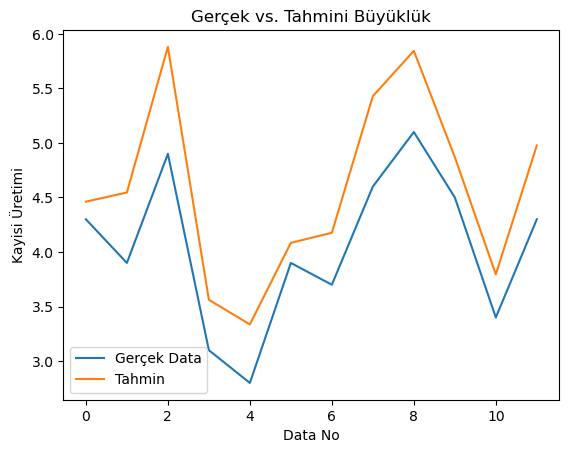

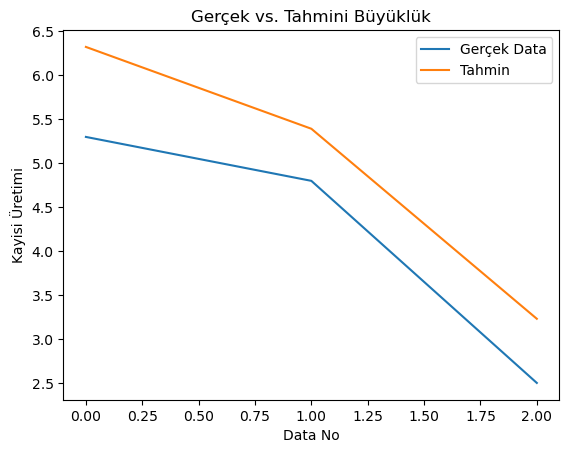

In [8]:
# Şimdi yapay sinir ağı ile tahmin modeli geliştirelim.
# Gerekli bazı kütüphaneler ve metodlar yüklenmeli
from sklearn.neural_network import MLPRegressor  # Çok katmanlı yapay sinir ağını regresyon uygulaması için
from sklearn.metrics import mean_absolute_error, mean_squared_error # regresyon performansı hesaplamaları için
import matplotlib.pyplot as plt  # çizim işlemleri için

# MLPRegressor önemli parametreler: activation: str = "relu", *, solver: str = "adam",
# alpha: float = 0.0001 (Regulasyon katsayısı, ağırlıkların minimizasyonu sağlayarak genellemeye katkı sağlar)
# batch_size: str = "auto", learning_rate: str = "constant", learning_rate_init: float = 0.001,
# validation_fraction: float = 0.1
# Aktivasyon fonksiyonu seçenekleri activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# Optimizasyon algortiması seçenekleri solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# Diğer parametreleriçin https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

model = MLPRegressor(hidden_layer_sizes=(100,50,20), max_iter=1000, random_state=42)

# modelin eğitim kümesi ile eğitimi için
h= model.fit(X_train, y_train)

# Model elde edildi. Şimdi Eğitim kümesi ve test kümesi performanslarını inceleyelim.

# Eğitim kümesi üzerinde tahmin yapılıyor.
y_pred_train = model.predict(X_train)
# Eğitim kümesi üzerinde performans ölçülüyor
Hata_train=y_train-y_pred_train
print('Eğitim kümesi veri başına hatalar: \n',Hata_train)
# Model performansını değerlendirelim
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Eğitim Kümesi Ortalama Mutlak Hata (MAE): {mae_train:.4f}')
print(f'Eğitim Kümesi Ortalama Kare Hata (MSE): {mse_train:.4f}')

# Test kümesi üzerinde tahmin yapılıyor.
y_pred_test = model.predict(X_test)
# Eğitim kümesi üzerinde performans ölçülüyor
Hata_test=y_test-y_pred_test
print('Eğitim kümesi veri başına hatalar: \n',Hata_test)
# Model performansını değerlendirelim
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Test Kümesi Üzerinde Ortalama Mutlak Hata (MAE): {mae_test:.4f}')
print(f'Test Kümesi Üzerinde Ortalama Kare Hata (MSE): {mse_test:.4f}')

# Eğitim kümesi veri ile tahmin verisini birlikte çizelim.
plt.plot(y_train.to_numpy())
plt.plot(y_pred_train)
plt.xlabel('Data No')
plt.ylabel('Kayisi Üretimi')
plt.title('Gerçek vs. Tahmini Büyüklük')
plt.legend(['Gerçek Data','Tahmin'])
plt.show()

# Test kümesi veri ile tahmin verisini birlikte çizelim.
plt.plot(y_test.to_numpy())
plt.plot(y_pred_test)
plt.xlabel('Data No')
plt.ylabel('Kayisi Üretimi')
plt.title('Gerçek vs. Tahmini Büyüklük')
plt.legend(['Gerçek Data','Tahmin'])
plt.show()

#DENEY:
# Test kümesi oranı %20 ve kalan %80 eğitim kümesi olsun.
# İyi bir genelleme sağlamak için eğitim kümesi ve test kümesi için
# hatalar yeterince düşük ve birbirine yakın değer almalı.
# Modelin ağ mimarisini (katmanlardaki nöron sayılarını) hidden_layer_sizes=(100,50,20)
# ile ayarlayınız. Bu modelin matematiksel karmaşıklığını değiştirecektir.
# Eğitim kümesi ve test kümesi ortalama performaslarını birbirine yaklaştırmaya
# çalışınız.

In [9]:
# [sicaklık Nem]=[1 3] için kayısı üreti tahmini
y_pred1 = model.predict([[1,3]])
print('Tahmin :',y_pred1)

# Başarılı model mimarisi hidden_layer_sizes=(100)

Tahmin : [2.04834285]


C:\Users\duran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
